# **Классификация электронных писем**

## 0. Словесное описание задачи.





 На протяжении некоторого времени авторы датасета собирали личные и рабочие письма, среди которых также присутствуют спам-письма: реклама продуктов, схемы быстрого заработка и так далее. Были выделены слова, которые встречаются в спаме, и частота их встречаемости во всех письмах задокументирована в датасете.

 Необходимо определить, является ли письмо спамом или нет.


## 1. Чтение данных.
Набор данных содержит обучающую и тестовую выборки.

In [1]:
# Массивы
import numpy as np

# Графическое отображение
import matplotlib.pyplot as plt
import seaborn as sns

# Таблицы и временные ряды
import pandas as pd

# Математические функции
from cmath import nan

# Разделение на выборки
from sklearn.model_selection import train_test_split

# Решение задачи классификации
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from yellowbrick.classifier import confusion_matrix, class_prediction_error

from sklearn import preprocessing
from sklearn import utils

Рассмотрим данные обучающей выборки и проанализируем имеющиеся признаки.

In [2]:
spam_data = pd.read_csv('spambase.csv')

In [3]:
spam_data.shape

(4601, 58)

Количество строк - число писем 4601, количество столбцов-признаков 58.

Составим таблицу представления признаков.


In [4]:
spam_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Рассмотрим признаки.

In [5]:
spam_data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [6]:
spam_data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

## 2. Визуализация данных и вычисление основных характеристик.
Выведем сводную информацию о числовых признаках.

In [7]:
spam_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


В описании можно увидеть:

1. count - количество значений для каждого признака.
2. mean - среднее значение
3. std - стандартное отклонение
4. min/max - минимальное / максимальное значение
5. 25% - первый квартиль
6. 50% - медиана
7. 75% - третий квартиль

Проверим наличие выбросов в признаках, найдем квартили для признаков.


In [8]:
spam_data["word_freq_our"].quantile([.01,.05,.1,.5, .8, .9,.95, .985, .99,.995])

0.010    0.00
0.050    0.00
0.100    0.00
0.500    0.00
0.800    0.53
0.900    1.03
0.950    1.49
0.985    2.48
0.990    2.94
0.995    3.92
Name: word_freq_our, dtype: float64

In [9]:
spam_data["capital_run_length_longest"].quantile([.005,.01,.05,.1,.5, .8, .9,.95, .97, .99,.995])

0.005      1.0
0.010      1.0
0.050      1.0
0.100      3.0
0.500     15.0
0.800     54.0
0.900     99.0
0.950    181.0
0.970    305.0
0.990    669.0
0.995    798.0
Name: capital_run_length_longest, dtype: float64

In [10]:
spam_data["word_freq_internet"].quantile([.005,.01,.05,.1,.5, .8, .9,.95,.99,.995, .9995])

0.0050    0.00
0.0100    0.00
0.0500    0.00
0.1000    0.00
0.5000    0.00
0.8000    0.00
0.9000    0.32
0.9500    0.60
0.9900    1.62
0.9950    2.53
0.9995    5.52
Name: word_freq_internet, dtype: float64

In [11]:
spam_data["word_freq_free"].quantile([.005,.01,.05,.1,.5, .8, .9,.95,.99,.995, .9995])

0.0050     0.00
0.0100     0.00
0.0500     0.00
0.1000     0.00
0.5000     0.00
0.8000     0.29
0.9000     0.77
0.9500     1.34
0.9900     3.26
0.9950     4.65
0.9995    14.71
Name: word_freq_free, dtype: float64

99% пользователей задержали от 0 до 27 платежей.

In [12]:
spam_data["word_freq_money"].quantile([.005,.01,.05,.1,.5, .8, .9,.95, .98, .985, .99,.995, .9995])

0.0050    0.00
0.0100    0.00
0.0500    0.00
0.1000    0.00
0.5000    0.00
0.8000    0.00
0.9000    0.30
0.9500    0.57
0.9800    0.98
0.9850    1.16
0.9900    1.31
0.9950    1.69
0.9995    9.09
Name: word_freq_money, dtype: float64

Удалим строки, где признаки выходят за пределы квантилей.

In [13]:
spam_data_rows_to_drop = spam_data[
    (spam_data["word_freq_our"] < spam_data["word_freq_our"].quantile(0.005)) | (spam_data["word_freq_our"] > spam_data["word_freq_our"].quantile(0.985)) |
    (spam_data["capital_run_length_longest"] < spam_data["capital_run_length_longest"].quantile(0.005)) | (spam_data["capital_run_length_longest"] > spam_data["capital_run_length_longest"].quantile(0.97)) |
    (spam_data["word_freq_internet"] < spam_data["word_freq_internet"].quantile(0.005)) | (spam_data["word_freq_internet"] > spam_data["word_freq_internet"].quantile(0.995)) |
    (spam_data["word_freq_free"] < spam_data["word_freq_free"].quantile(0.01)) | (spam_data["word_freq_free"] > spam_data["word_freq_free"].quantile(0.99)) |
    (spam_data["word_freq_money"] < spam_data["word_freq_money"].quantile(0.005)) | (spam_data["word_freq_money"] > spam_data["word_freq_money"].quantile(0.98))].index

clean_spam_data = spam_data.drop(spam_data_rows_to_drop)
clean_spam_data.shape

(4244, 58)

Таким образом, количество писем для обраотки уменьшилось.

Вычислим матрицу корреляции.

In [14]:
corr_mat = clean_spam_data.corr()
corr_mat

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,-0.031247,0.062248,-0.011356,0.055342,0.041887,0.013829,-0.000950,0.069931,0.019681,...,-0.025878,-0.020322,-0.031329,0.034566,0.111110,-0.010003,0.004710,0.065703,0.068587,0.100814
word_freq_address,-0.031247,1.000000,-0.038765,-0.005900,-0.027643,-0.029408,0.002576,-0.019773,-0.008037,0.023691,...,-0.006511,-0.059521,-0.018564,-0.020321,-0.014985,0.001787,-0.008154,-0.017778,-0.027403,-0.035809
word_freq_all,0.062248,-0.038765,1.000000,-0.017199,0.118136,0.065393,0.036437,0.032277,0.048137,0.006786,...,-0.027178,-0.012494,-0.028540,0.092725,0.071040,-0.002227,0.010201,0.103276,0.044425,0.167152
word_freq_3d,-0.011356,-0.005900,-0.017199,1.000000,0.005782,-0.011769,0.008409,-0.003208,-0.010116,-0.000597,...,-0.002102,-0.009345,-0.006067,-0.004253,0.004502,0.000707,0.049505,0.079092,0.023846,0.051497
word_freq_our,0.055342,-0.027643,0.118136,0.005782,1.000000,0.089230,0.176894,0.099438,0.043818,0.056977,...,-0.034591,-0.054383,-0.023387,0.041216,0.071127,0.013186,0.073881,0.173734,0.026584,0.347115
word_freq_over,0.041887,-0.029408,0.065393,-0.011769,0.089230,1.000000,0.057306,0.113805,0.035930,-0.002965,...,-0.014936,-0.006350,-0.023567,0.059186,0.098580,0.023840,0.014151,0.080922,0.040953,0.213850
word_freq_remove,0.013829,0.002576,0.036437,0.008409,0.176894,0.057306,1.000000,0.088552,0.048362,0.066435,...,-0.031505,-0.054129,-0.029251,0.057165,0.081813,0.052920,0.312060,0.196458,-0.015323,0.343117
word_freq_internet,-0.000950,-0.019773,0.032277,-0.003208,0.099438,0.113805,0.088552,1.000000,0.128991,0.093333,...,-0.031171,-0.022872,-0.021399,0.041256,0.087953,-0.013504,0.189897,0.171101,0.076431,0.262190
word_freq_order,0.069931,-0.008037,0.048137,-0.010116,0.043818,0.035930,0.048362,0.128991,1.000000,0.110202,...,-0.009264,-0.028212,0.019978,0.030611,0.124815,-0.000741,0.243949,0.282213,0.207895,0.195613
word_freq_mail,0.019681,0.023691,0.006786,-0.000597,0.056977,-0.002965,0.066435,0.093333,0.110202,1.000000,...,0.011545,0.012069,0.011542,0.015764,0.055984,0.048468,0.150106,0.150619,0.057861,0.113191


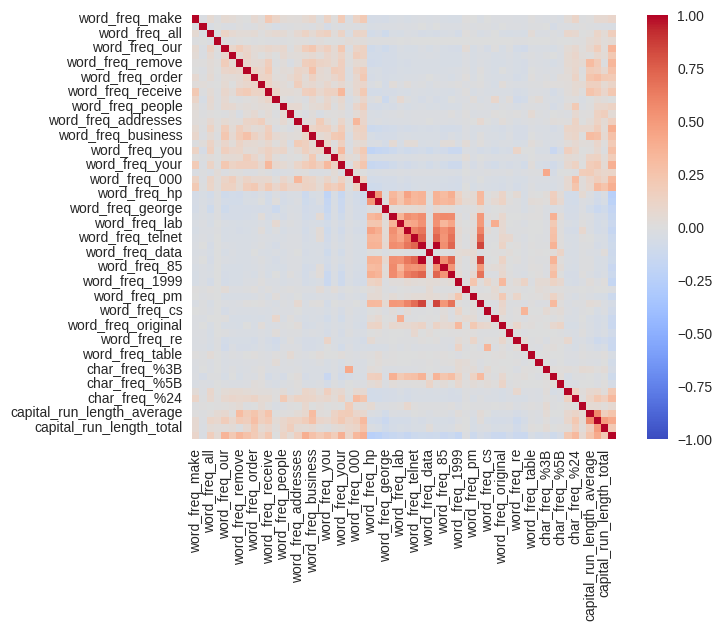

In [15]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

## 3. Обработка пропусков.

In [16]:
clean_spam_data.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Пропущенные значения отутствуют.

## 4. Обработка категориальных признаков.

Категориальные признаки отсутствуют.

## 5. Нормализация.
Проведем стандартизацию признаков, чтобы в дальнейшем воспользоваться методом k-ближайших соседей.

In [17]:
spam_data_stand = (spam_data - spam_data.mean(axis = 0))/spam_data.std(axis = 0)

spam_data_stand.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,-0.342396,0.330849,0.712781,-0.046894,0.011563,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.514251,-0.155181,0.623939,-0.308321,-0.103037,-0.045242,0.045293,-0.008723,1.239939
1,0.345322,0.051904,0.435082,-0.046894,-0.256089,0.672326,0.244717,-0.088001,-0.323267,1.086593,...,-0.158436,-0.026004,-0.155181,0.126189,0.423737,0.008762,-0.002443,0.250536,1.228191,1.239939
2,-0.145906,-0.165054,0.851631,-0.046894,1.364698,0.343648,0.193623,0.036666,1.973802,0.016420,...,-0.117364,0.014683,-0.155181,0.008495,0.440005,-0.079746,0.145905,2.220865,3.258378,1.239939
3,-0.342396,-0.165054,-0.556700,-0.046894,0.472521,-0.350228,0.500183,1.308259,0.789376,0.605791,...,-0.158436,-0.007510,-0.155181,-0.161917,-0.308321,-0.103037,-0.052144,-0.062459,-0.152205,1.239939
4,-0.342396,-0.165054,-0.556700,-0.046894,0.472521,-0.350228,0.500183,1.308259,0.789376,0.605791,...,-0.158436,-0.014908,-0.155181,-0.164369,-0.308321,-0.103037,-0.052144,-0.062459,-0.152205,1.239939


## 6. Разбиение данных на обучающую и тестовую выборки.

In [18]:
X = spam_data_stand.drop(["class"], axis=1)
y_ = spam_data_stand["class"]
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y_)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((3450, 57), (1151, 57))

In [19]:
y_.value_counts()

-0.806316    2788
 1.239939    1813
Name: class, dtype: int64

In [20]:
classes = [0, 1]

## 7. Использование классификатора k-ближайших соседей.

Возьмем стандартное значение - 5 соседей.

In [21]:
knn = KNeighborsClassifier(5)
knn.fit(X_train.values, y_train)
y_train_predict = knn.predict(X_train.values)
y_test_predict = knn.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 93.10%, Test: 90.01%
MSE: Train 0.07, Test 0.10


Построим матрицу рассогласования.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


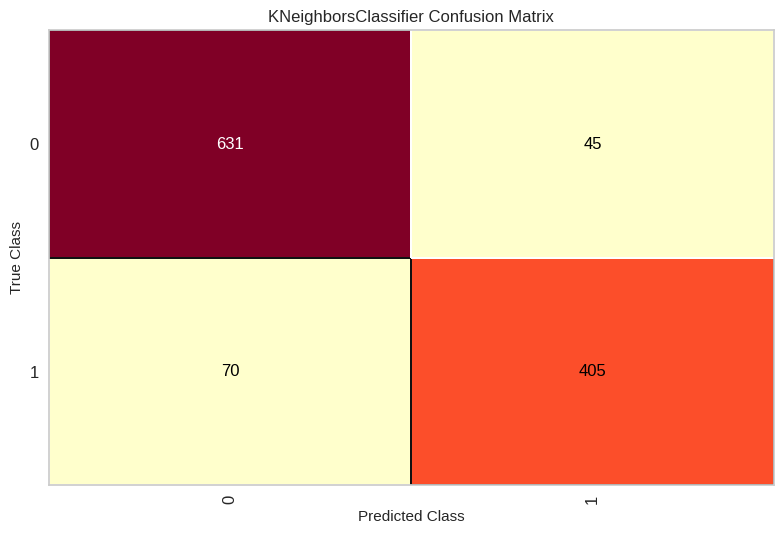

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f456326eb30>,
                estimator=KNeighborsClassifier())

In [22]:
confusion_matrix(knn, X_train, y_train, X_test, y_test, classes=classes)

Построим диаграмму, чтобы увидеть ошибку наглядно.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


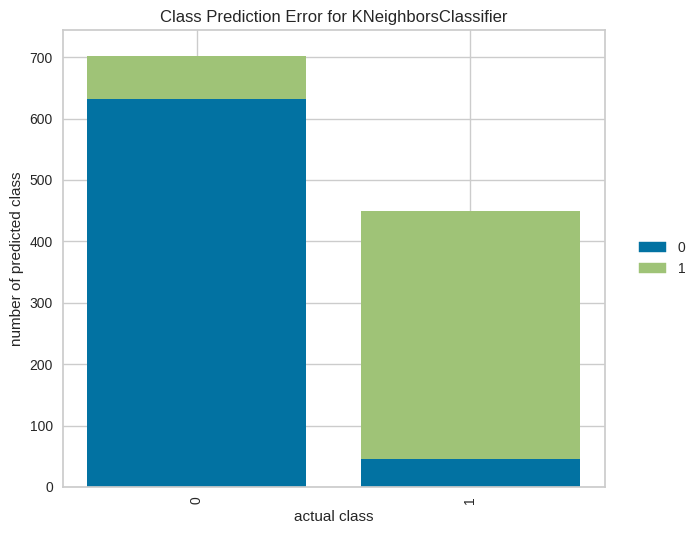

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1], estimator=KNeighborsClassifier())

In [23]:
class_prediction_error(knn, X_train, y_train, X_test, y_test, classes=classes)

Рассмотрим 7 соседей.

In [24]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train.values, y_train)
y_train_predict = knn_7.predict(X_train.values)
y_test_predict = knn_7.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 92.67%, Test: 90.18%
MSE: Train 0.07, Test 0.10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


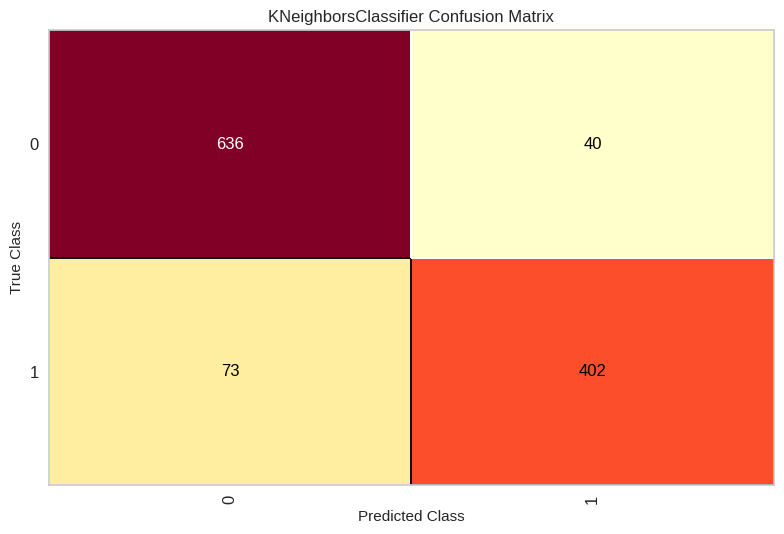

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f45631a6d40>,
                estimator=KNeighborsClassifier(n_neighbors=7))

In [25]:
confusion_matrix(knn_7, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


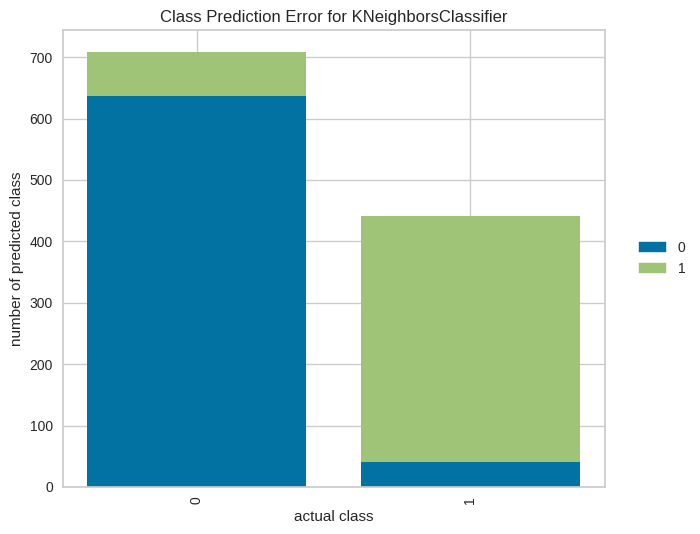

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1],
                     estimator=KNeighborsClassifier(n_neighbors=7))

In [26]:
class_prediction_error(knn_7, X_train, y_train, X_test, y_test, classes=classes)

Возьмем 15 соседей.

In [27]:
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train.values, y_train)
y_train_predict = knn_15.predict(X_train.values)
y_test_predict = knn_15.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 91.42%, Test: 90.10%
MSE: Train 0.09, Test 0.10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


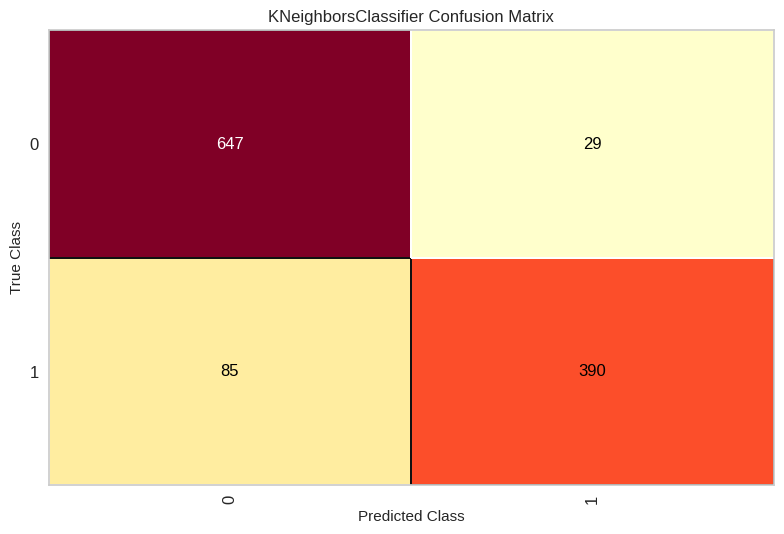

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f455d77b520>,
                estimator=KNeighborsClassifier(n_neighbors=15))

In [28]:
confusion_matrix(knn_15, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


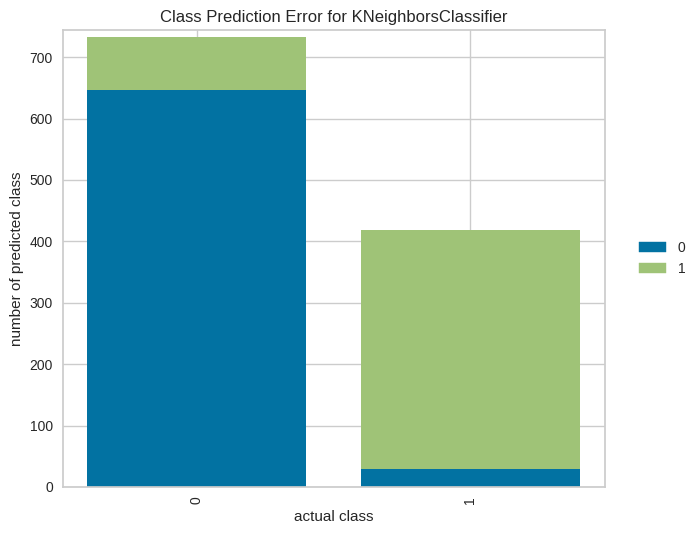

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1],
                     estimator=KNeighborsClassifier(n_neighbors=15))

In [29]:
class_prediction_error(knn_15, X_train, y_train, X_test, y_test, classes=classes)

In [30]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train.values, y_train)
y_train_predict = knn_3.predict(X_train.values)
y_test_predict = knn_3.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 94.58%, Test: 89.83%
MSE: Train 0.05, Test 0.10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


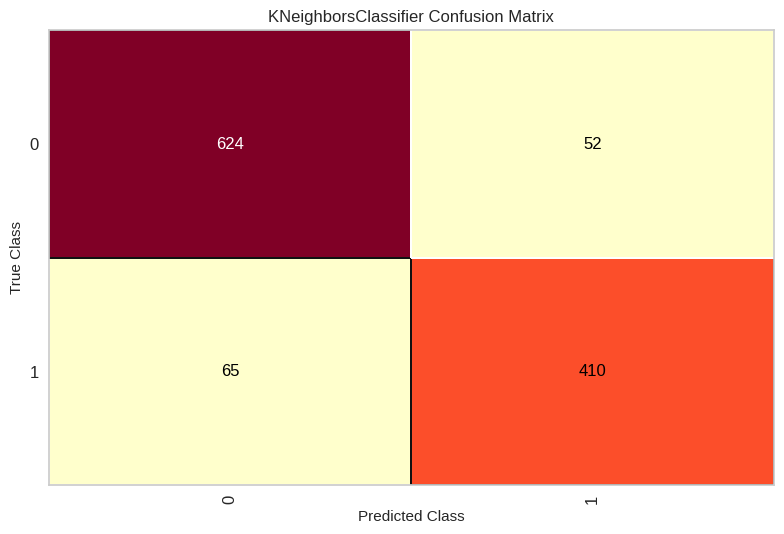

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f455d7c25c0>,
                estimator=KNeighborsClassifier(n_neighbors=3))

In [31]:
confusion_matrix(knn_3, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


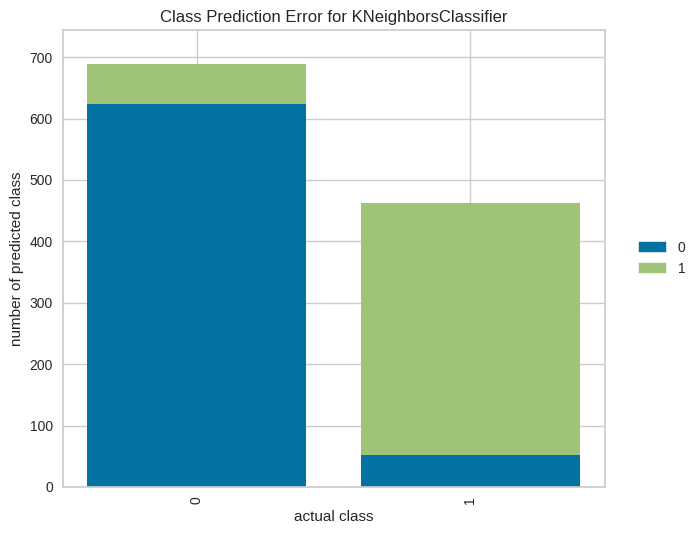

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1],
                     estimator=KNeighborsClassifier(n_neighbors=3))

In [32]:
class_prediction_error(knn_3, X_train, y_train, X_test, y_test, classes=classes)

Попробуем посмотреть 2 соседей.

In [33]:
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train.values, y_train)
y_train_predict = knn_2.predict(X_train.values)
y_test_predict = knn_2.predict(X_test.values)
print("Train: {:.2f}%, Test: {:.2f}%".format(accuracy_score(
    y_train, y_train_predict) * 100, accuracy_score(y_test, y_test_predict) * 100))
print("MSE: Train {:.2f}, Test {:.2f}".format((mean_squared_error(y_train,
      y_train_predict)), mean_squared_error(y_test, y_test_predict)))

Train: 95.01%, Test: 88.53%
MSE: Train 0.05, Test 0.11


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


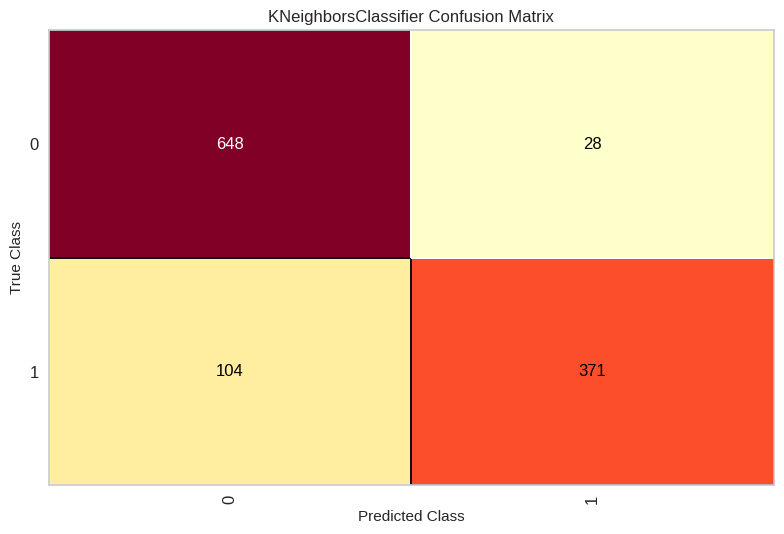

ConfusionMatrix(ax=<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f455d77b490>,
                estimator=KNeighborsClassifier(n_neighbors=2))

In [34]:
confusion_matrix(knn_2, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


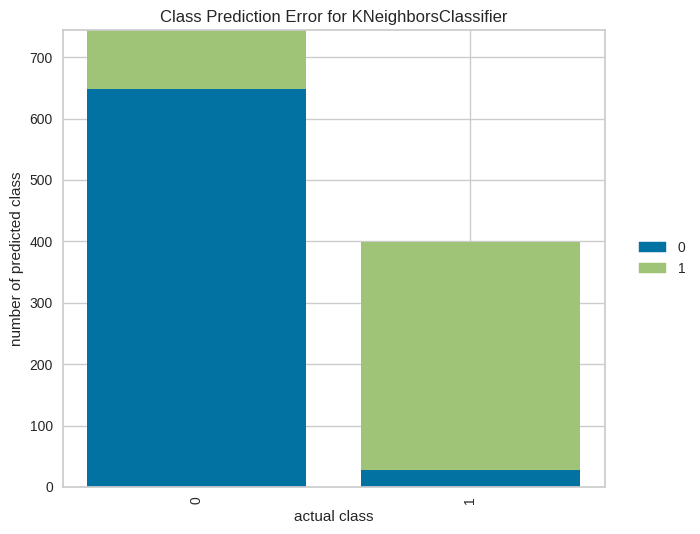

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1],
                     estimator=KNeighborsClassifier(n_neighbors=2))

In [35]:
class_prediction_error(knn_2, X_train, y_train, X_test, y_test, classes=classes)

Минимальная ошика на тестирующей выборке была достигнута при использовании метода ближайших соседей при выоре 7-ми соседей.

## 8. Логистическая регрессия.

Возьмем 500 итераций.

In [58]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=500)
LR.fit(X_train, y_train)

LR_training_predict = LR.score(X_train, y_train)
LR_test_predict = LR.score(X_test, y_test)

err_train = np.mean(y_train != LR.predict(X_train))
err_test  = np.mean(y_test  != LR.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(LR_training_predict, LR_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.93, Test: 0.92. 
Error. Train : 0.07, Test: 0.08. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


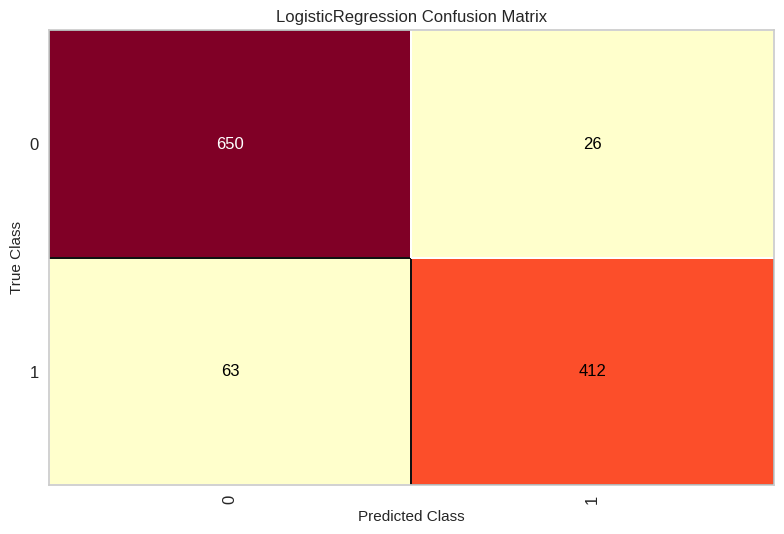

ConfusionMatrix(ax=<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f4563d540a0>,
                estimator=LogisticRegression(max_iter=500))

In [59]:
confusion_matrix(LR, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


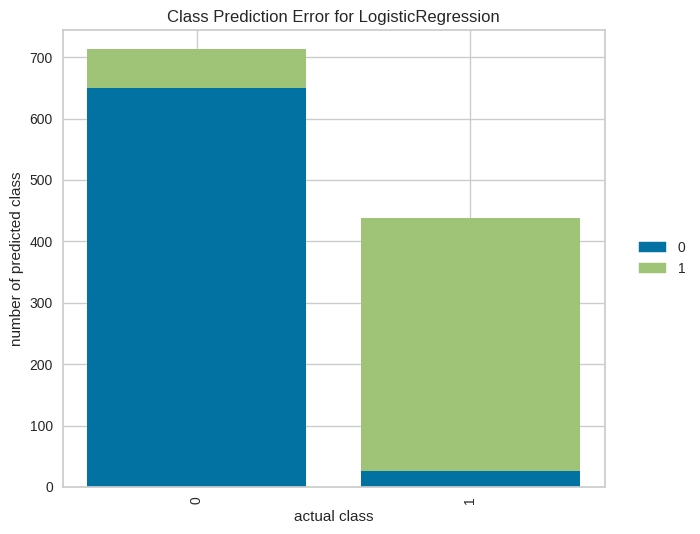

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1],
                     estimator=LogisticRegression(max_iter=500))

In [60]:
class_prediction_error(LR, X_train, y_train, X_test, y_test, classes=classes)

## 9. Random Forest.

Возьмем глубину, равную 4.

In [39]:
from sklearn.ensemble import RandomForestClassifier
RanForest = RandomForestClassifier(n_estimators = 100, max_depth = 4)
RanForest.fit(X_train, y_train)

RanForest_training_predict = RanForest.score(X_train, y_train)
RanForest_test_predict = RanForest.score(X_test, y_test)

err_train = np.mean(y_train != RanForest.predict(X_train))
err_test  = np.mean(y_test  != RanForest.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(RanForest_training_predict, RanForest_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.92, Test: 0.92. 
Error. Train : 0.08, Test: 0.08. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


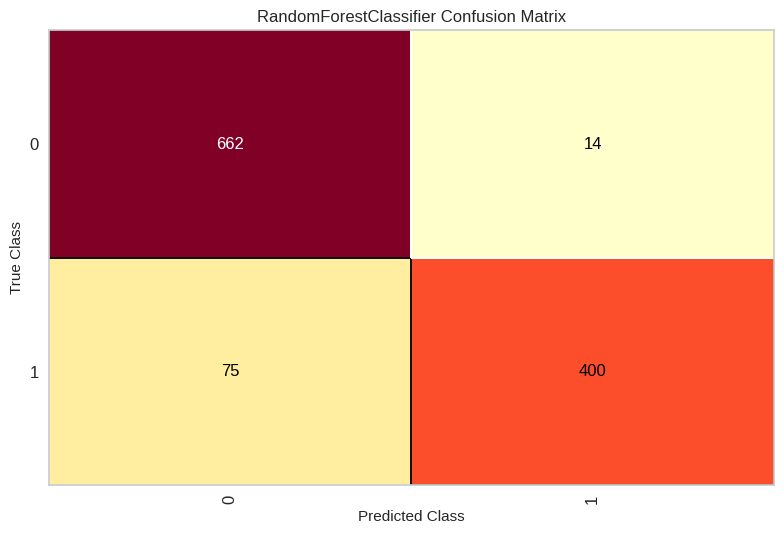

ConfusionMatrix(ax=<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f4563d193f0>,
                estimator=RandomForestClassifier(max_depth=4))

In [40]:
confusion_matrix(RanForest, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


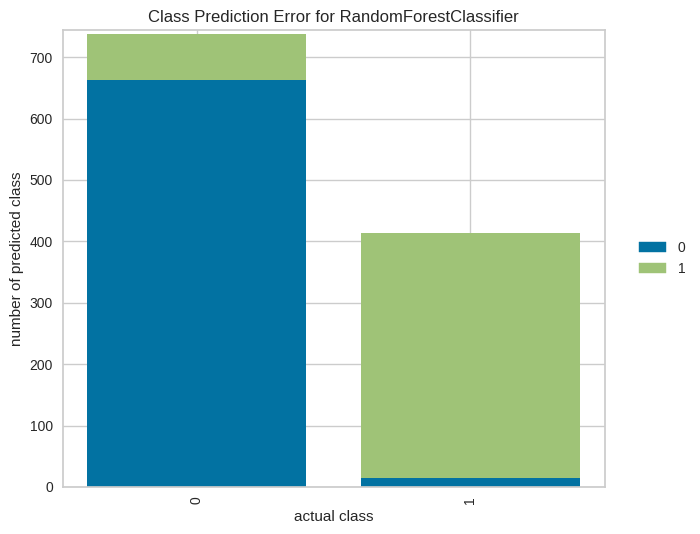

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1],
                     estimator=RandomForestClassifier(max_depth=4))

In [41]:
class_prediction_error(RanForest, X_train, y_train, X_test, y_test, classes=classes)

Изменим максимальную глубину max_depth с 4 до 15.

In [42]:
RanForest = RandomForestClassifier(n_estimators = 100, max_depth = 15)
RanForest.fit(X_train, y_train)

RanForest_training_predict = RanForest.score(X_train, y_train)
RanForest_test_predict = RanForest.score(X_test, y_test)

err_train = np.mean(y_train != RanForest.predict(X_train))
err_test  = np.mean(y_test  != RanForest.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(RanForest_training_predict, RanForest_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.99, Test: 0.95. 
Error. Train : 0.01, Test: 0.05. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


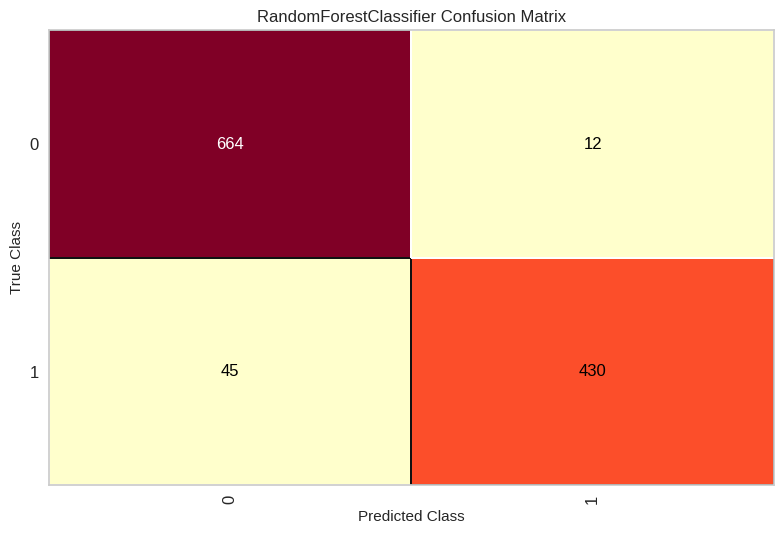

ConfusionMatrix(ax=<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f45633f6530>,
                estimator=RandomForestClassifier(max_depth=15))

In [43]:
confusion_matrix(RanForest, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


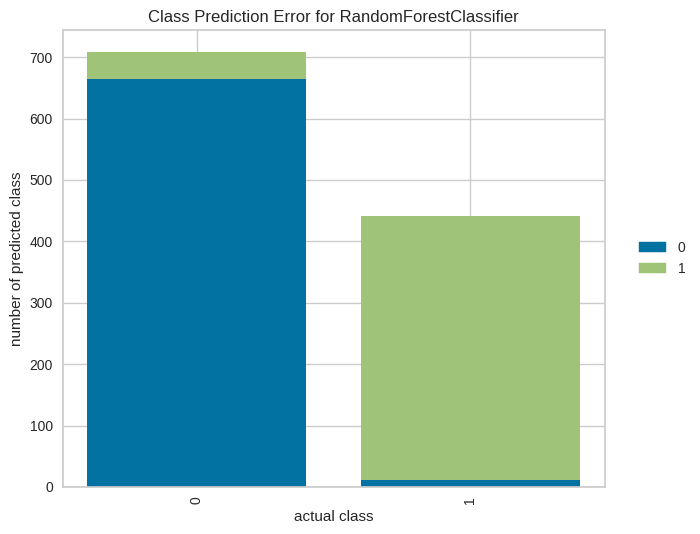

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1],
                     estimator=RandomForestClassifier(max_depth=15))

In [44]:
class_prediction_error(RanForest, X_train, y_train, X_test, y_test, classes=classes)

Точность при увеличении max_depth возросла.

## 10. GradientBoosting.

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100)
GB.fit(X_train, y_train)

GB_training_predict = GB.score(X_train, y_train)
GB_test_predict = GB.score(X_test, y_test)

err_train = np.mean(y_train != GB.predict(X_train))
err_test  = np.mean(y_test  != GB.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(GB_training_predict, GB_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.96, Test: 0.95. 
Error. Train : 0.04, Test: 0.05. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


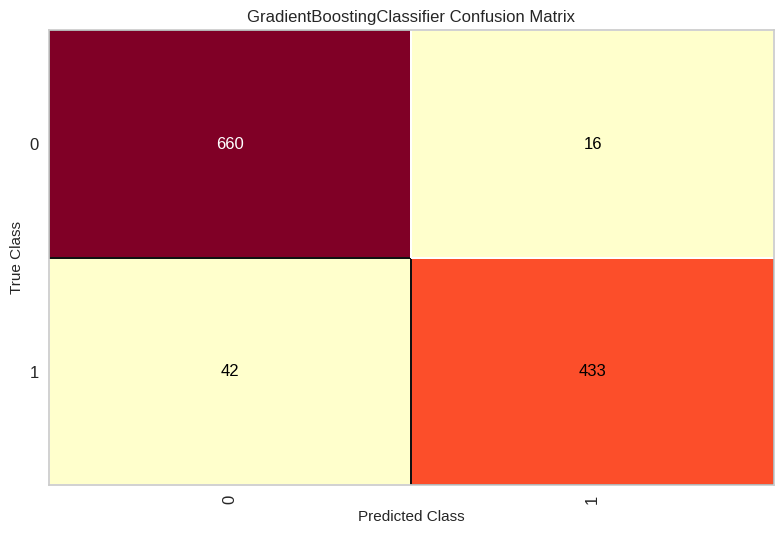

ConfusionMatrix(ax=<Axes: title={'center': 'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f455d629ff0>,
                estimator=GradientBoostingClassifier())

In [46]:
confusion_matrix(GB, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


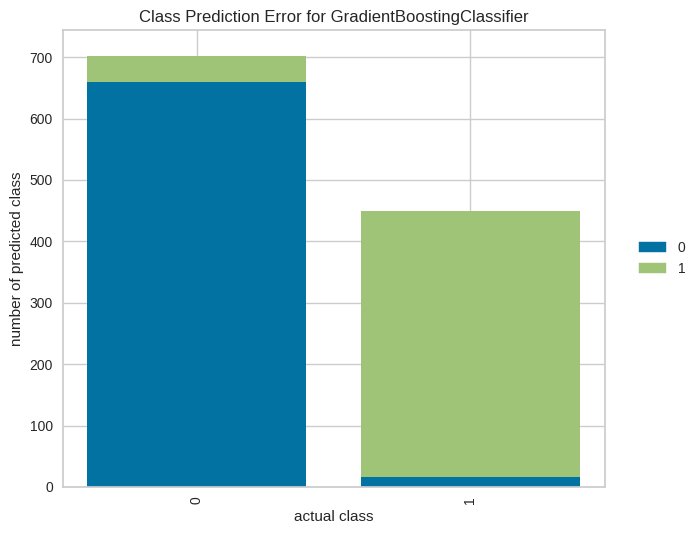

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for GradientBoostingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1], estimator=GradientBoostingClassifier())

In [47]:
class_prediction_error(GB, X_train, y_train, X_test, y_test, classes=classes)

## 11. Неглубокая нейронная сеть.

Возьмем однослойную сеть.

In [48]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(hidden_layer_sizes=(20), max_iter=1000)
NN.fit(X_train, y_train)

NN_training_predict = NN.score(X_train, y_train)
NN_test_predict = NN.score(X_test, y_test)

err_train = np.mean(y_train != NN.predict(X_train))
err_test  = np.mean(y_test  != NN.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(NN_training_predict, NN_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.99, Test: 0.95. 
Error. Train : 0.01, Test: 0.05. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


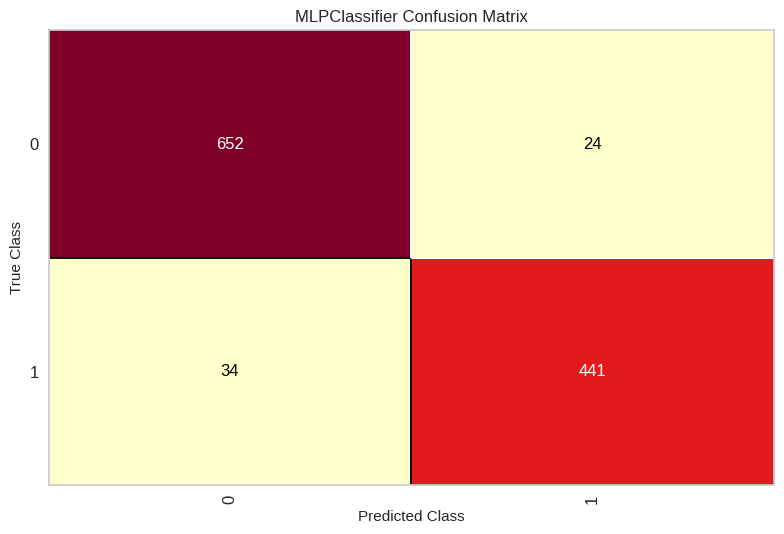

ConfusionMatrix(ax=<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=[0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f455d3ef5e0>,
                estimator=MLPClassifier(hidden_layer_sizes=20, max_iter=1000))

In [49]:
confusion_matrix(NN, X_train, y_train, X_test, y_test, classes=classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


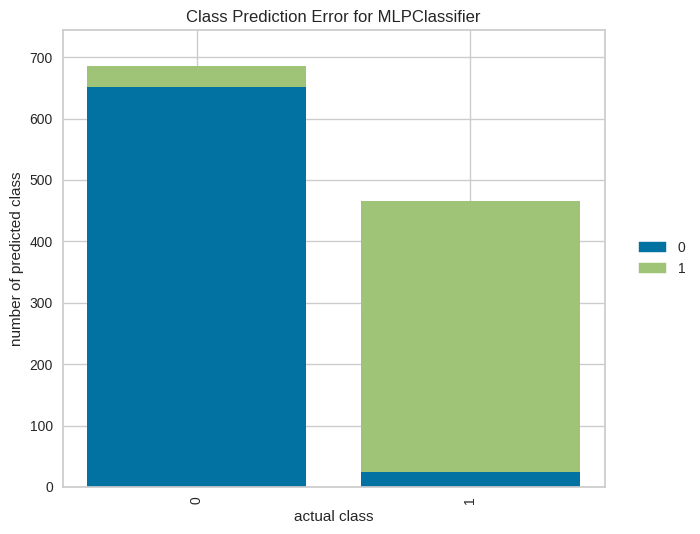

ClassPredictionError(ax=<Axes: title={'center': 'Class Prediction Error for MLPClassifier'}, xlabel='actual class', ylabel='number of predicted class'>,
                     classes=[0, 1],
                     estimator=MLPClassifier(hidden_layer_sizes=20,
                                             max_iter=1000))

In [50]:
class_prediction_error(NN, X_train, y_train, X_test, y_test, classes=classes)

Построим графики зависимости ошибки от гиперпараметров.

Рассмотрим зависимость ошибки от числа нейронов в скрытом слое.

In [51]:
array_neurons = np.arange(1, 20, 1)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neurons in array_neurons:
    mlp_model = MLPClassifier(hidden_layer_sizes=(neurons), max_iter=1000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

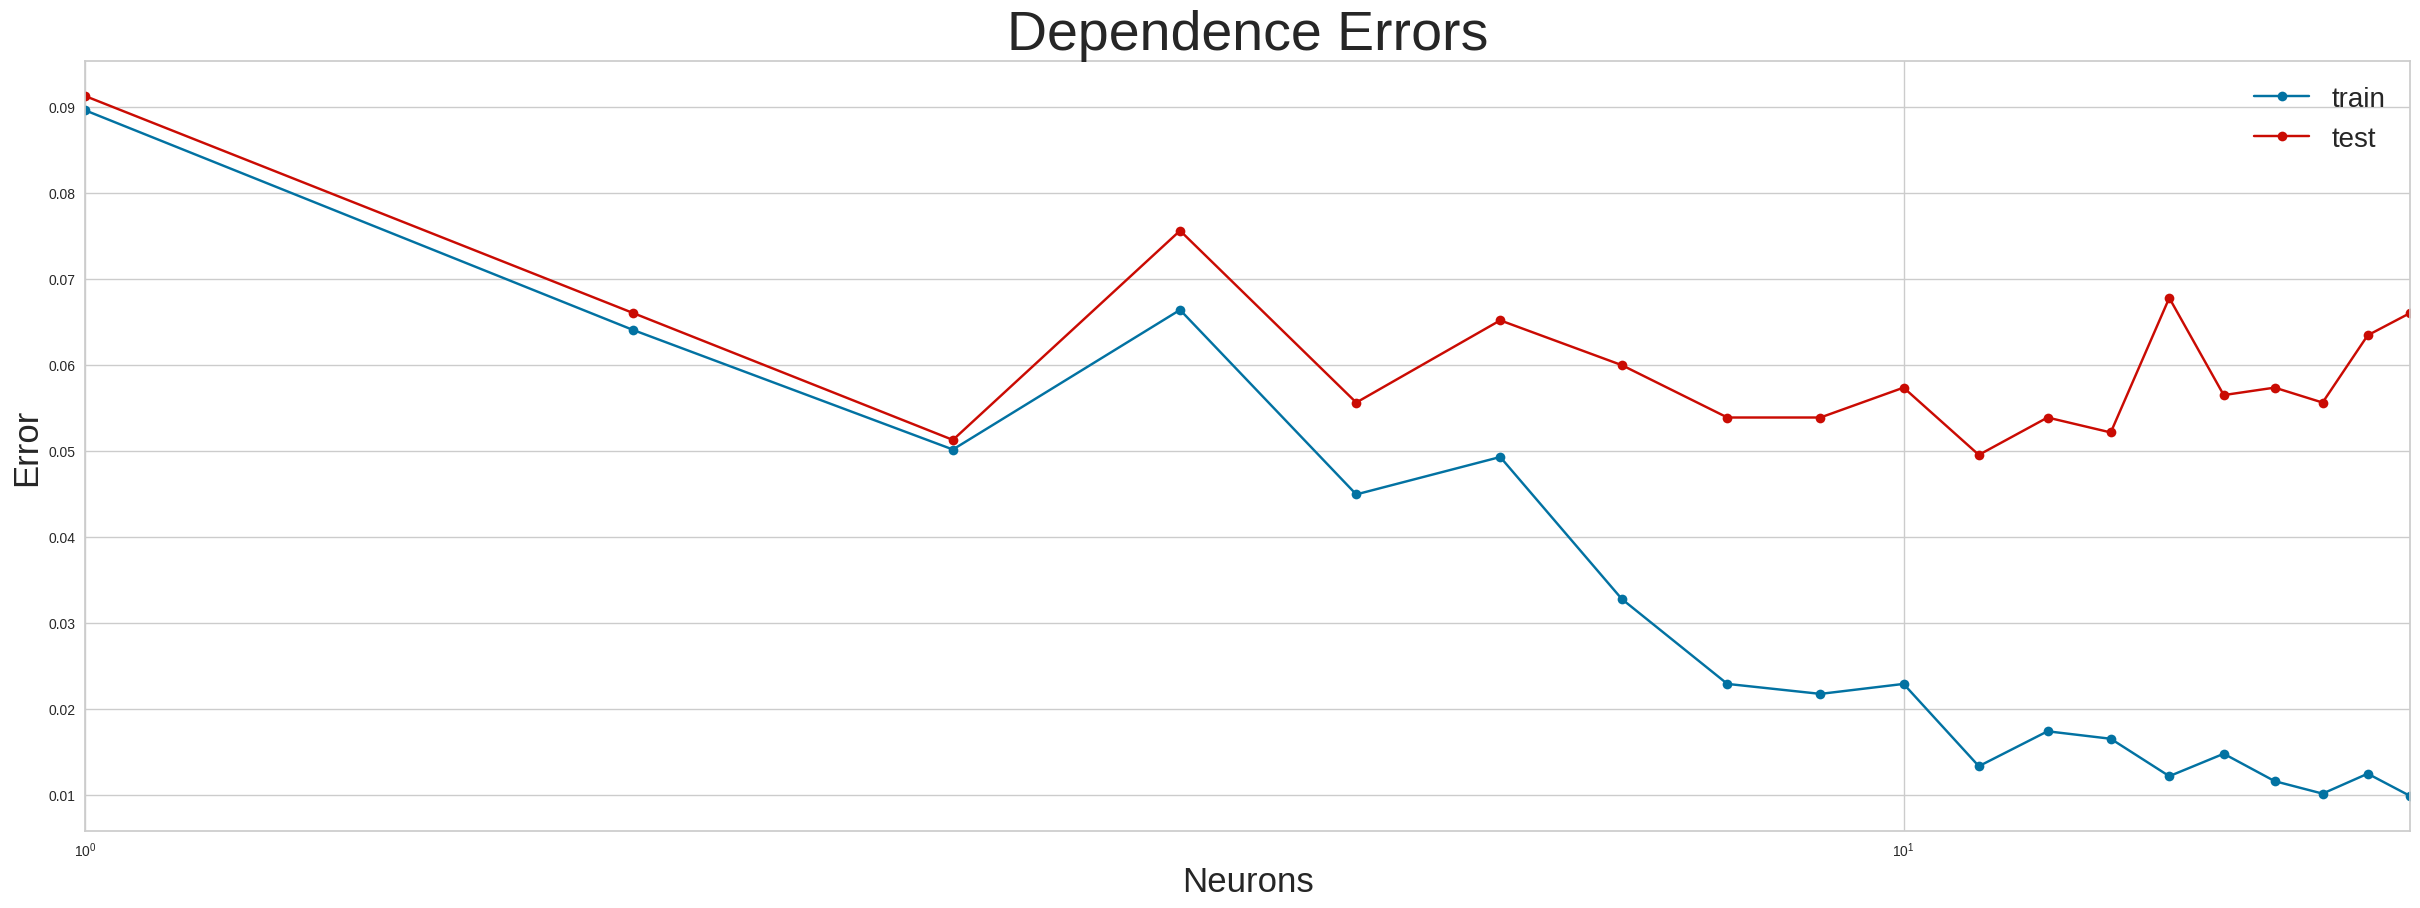

In [52]:
plt.figure(figsize = (30, 10))

plt.semilogx(array_neurons, train_err, 'b-o', label = 'train')
plt.semilogx(array_neurons, test_err, 'r-o', label = 'test')

plt.xlim([np.min(array_neurons), np.max(array_neurons)])

plt.title('Dependence Errors', fontsize = 40)
plt.xlabel('Neurons', fontsize = 25)
plt.ylabel('Error', fontsize = 25)

plt.legend(fontsize = 20)

Данный график показывает, что у нас есть некоторое переобучение, потому как ошибка на тестовых данных начинает увеличиваться на некотором шаге.

Рассмотрим зависимость величины ошибки от параметра $\alpha$.

In [53]:
range_alpha = np.linspace(0.0001, 0.001, 20)
layers = (20)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alphalc in range_alpha:
  NN = MLPClassifier(hidden_layer_sizes=layers, max_iter=1000, alpha = alphalc)
  NN.fit(X_train, y_train)
  y_train_pred = NN.predict(X_train)
  y_test_pred = NN.predict(X_test)

  train_err.append(np.mean(y_train != y_train_pred))
  test_err.append(np.mean(y_test != y_test_pred))

  train_acc.append(accuracy_score(y_train, y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))


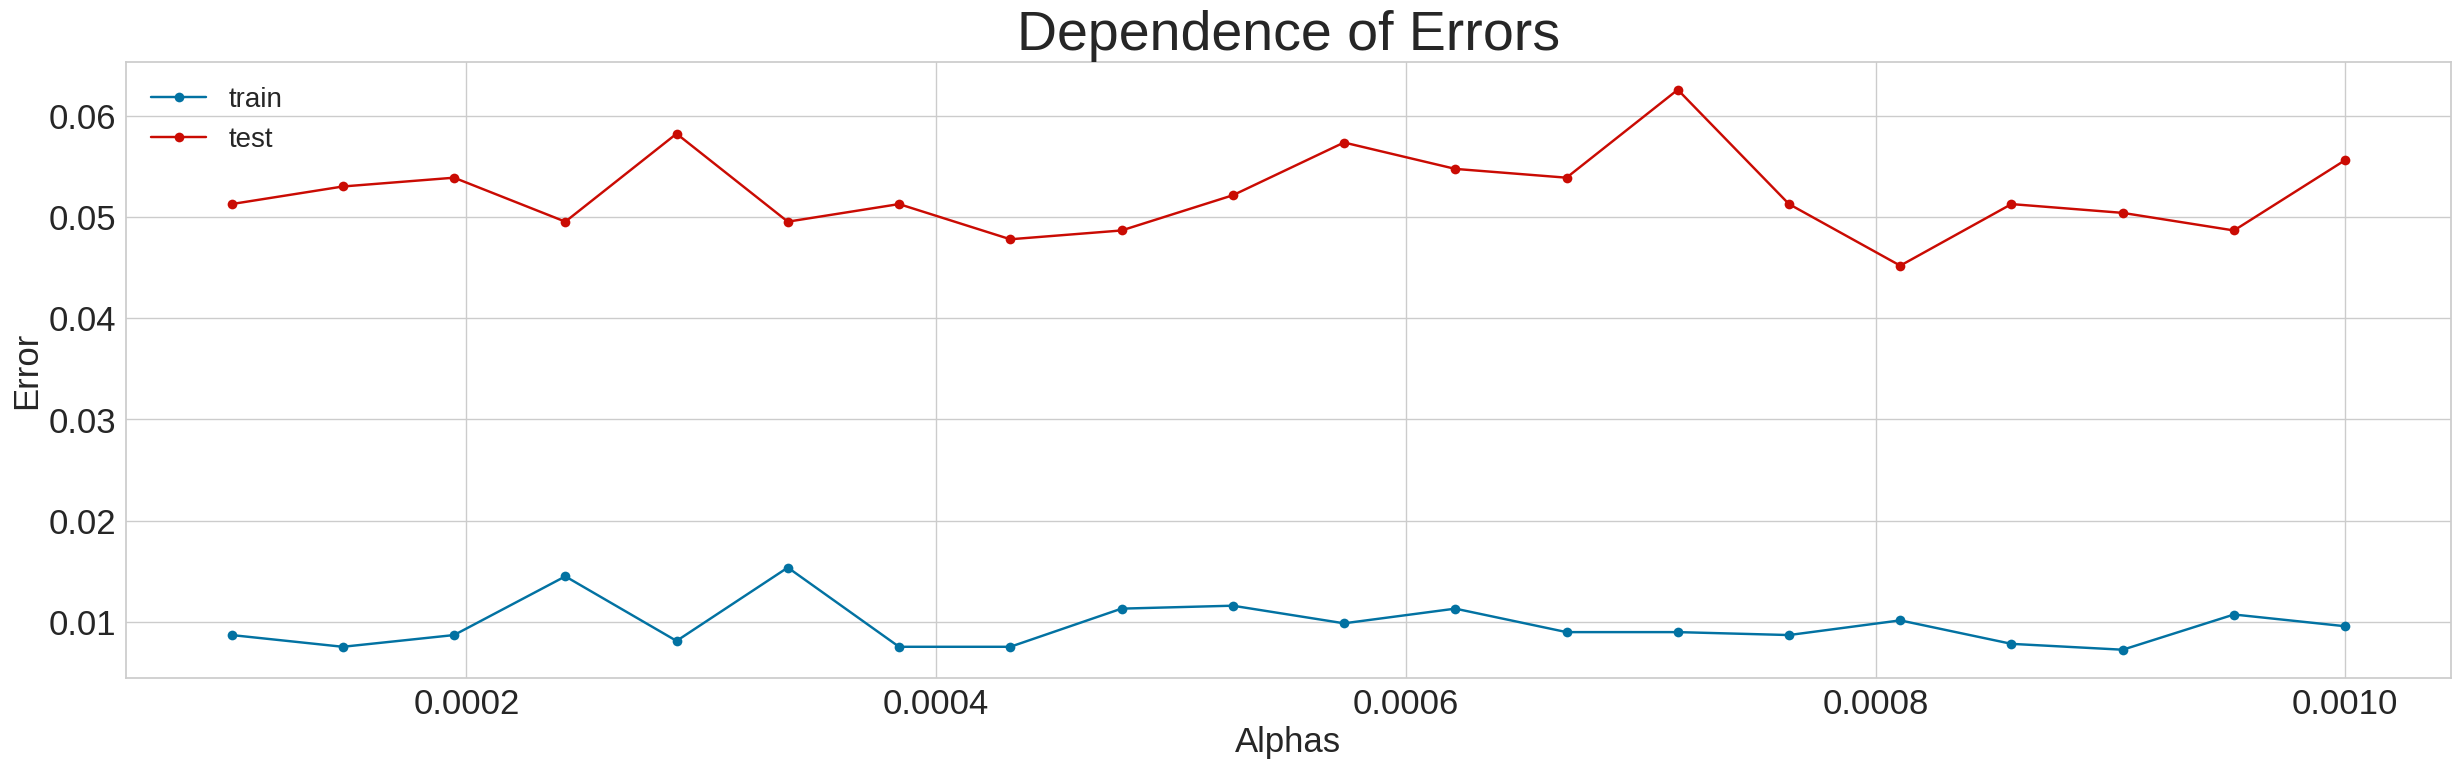

In [54]:
plt.figure(figsize = (30, 8))

plt.plot(range_alpha, train_err, 'b-o', label = 'train')
plt.plot(range_alpha, test_err, 'r-o', label = 'test')

plt.title('Dependence of Errors', fontsize = 40)
plt.xlabel('Alphas', fontsize = 25)
plt.ylabel('Error', fontsize = 25)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.tick_params(axis='both', which='minor', labelsize=25)

plt.legend(fontsize = 20)

Наилучший результат мы видим в самом начале обучения.

## 12. Выводы.
В результате данной работы были рассмотрены такие методы анализа данных, как  логистическая регрессия, RandomForest, Gradient Boost, а также полносвязная однослойная нейронная сеть. Были построены матрицы рассогласования, которые показывают, где ошибается нейронная сеть. Большая часть ошибок приходится на класс "1". Для одной нейронной сети подбирались различные наборы гиперпараметров, по ним были построены построить графики зависимости ошибки от них: зависимость величины ошибки обучения от параметра alpha и от количества нейронов.